In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# import datetime module
from datetime import datetime

# import apikey
from config import weather_api_key

# Import the requests library.
import requests


In [2]:
# create an empty list to hold the city weather data
city_date = []

# print the start of the loop
print('Beggining of Data Retrievel')
print('-----------------------------')

# initiate start and counter variable
record_count = 1
set_count = 1


Beggining of Data Retrievel
-----------------------------


In [3]:
# create a list of lat and long
lats = np.random.uniform(low=-90.000, high = 90.000, size=1500)
long = np.random.uniform(low=-90.000, high = 90.000, size=1500)
lat_long = zip(lats, long)
lat_long

In [4]:
# add the lat and long to a list
coordinates = list(lat_long)
# coordinates

In [5]:
# creat a list for holding cities
cities = []

# identify nearest city for each co-ordinate

for i in coordinates:
    city = citipy.nearest_city(i[0],i[1]).city_name
    
#    Check for duplicates
    if city not in cities:
        cities.append(city)
        
# print(cities)
print(len(cities) )  


615


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
range(len(cities))

range(0, 615)

In [8]:
i = 0
while i <= 1:
    city = "Houston"
    print(f"{city}")
#     city_url = url + '&q=' + city.replace("","+")
    city_url = url + '&q=' + "Houston"
    
    print(f"Processing Records {record_count} so set {set_count} | {city}")
    
    city_weather = requests.get(city_url)
    city_weather_json =  city_weather.json()
    
    print(city_weather_json)
    i += 1
    
    
    

Houston
Processing Records 1 so set 1 | Houston
{'coord': {'lon': -95.3633, 'lat': 29.7633}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.98, 'feels_like': 49.62, 'temp_min': 55, 'temp_max': 57.2, 'pressure': 1020, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 130}, 'clouds': {'all': 90}, 'dt': 1611977403, 'sys': {'type': 1, 'id': 4850, 'country': 'US', 'sunrise': 1611925968, 'sunset': 1611964579}, 'timezone': -21600, 'id': 4699066, 'name': 'Houston', 'cod': 200}
Houston
Processing Records 1 so set 1 | Houston
{'coord': {'lon': -95.3633, 'lat': 29.7633}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.98, 'feels_like': 49.62, 'temp_min': 55, 'temp_max': 57.2, 'pressure': 1020, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 130}, 'clouds': {'all': 90}, 'dt': 1611977403, 

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | hualmay
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | santa luzia
Processing Record 6 of Set 1 | nouakchott
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | bonavista
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | camacha
Processing Record 14 of Set 1 | praia da vitoria
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | vargem grande
Processing Record 21 of Set 1 | matara
Processing Record 22 of Set 1 | camabatela
Processing Re

Processing Record 34 of Set 4 | corbelia
Processing Record 35 of Set 4 | kaoma
Processing Record 36 of Set 4 | buraydah
Processing Record 37 of Set 4 | bathsheba
Processing Record 38 of Set 4 | trairi
Processing Record 39 of Set 4 | amderma
City not found. Skipping...
Processing Record 40 of Set 4 | tunceli
Processing Record 41 of Set 4 | harwich
Processing Record 42 of Set 4 | richards bay
Processing Record 43 of Set 4 | ginda
Processing Record 44 of Set 4 | paamiut
Processing Record 45 of Set 4 | turukhansk
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | dingle
Processing Record 48 of Set 4 | gilleleje
Processing Record 49 of Set 4 | buta
Processing Record 50 of Set 4 | safwah
City not found. Skipping...
Processing Record 1 of Set 5 | pokhara
Processing Record 2 of Set 5 | lagos
Processing Record 3 of Set 5 | danilov
Processing Record 4 of Set 5 | calama
Processing Record 5 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 5 | k

Processing Record 27 of Set 8 | hurghada
Processing Record 28 of Set 8 | kuche
City not found. Skipping...
Processing Record 29 of Set 8 | khorixas
Processing Record 30 of Set 8 | bud
Processing Record 31 of Set 8 | ous
Processing Record 32 of Set 8 | jardim
Processing Record 33 of Set 8 | rafai
Processing Record 34 of Set 8 | havelock
Processing Record 35 of Set 8 | inhambane
Processing Record 36 of Set 8 | peterhead
Processing Record 37 of Set 8 | leshukonskoye
Processing Record 38 of Set 8 | maine-soroa
Processing Record 39 of Set 8 | aktash
Processing Record 40 of Set 8 | mamontovo
Processing Record 41 of Set 8 | ustye
Processing Record 42 of Set 8 | zemio
Processing Record 43 of Set 8 | brae
Processing Record 44 of Set 8 | gornopravdinsk
Processing Record 45 of Set 8 | qandahar
City not found. Skipping...
Processing Record 46 of Set 8 | chinhoyi
Processing Record 47 of Set 8 | sao jose da coroa grande
Processing Record 48 of Set 8 | ugoofaaru
Processing Record 49 of Set 8 | portof

City not found. Skipping...
Processing Record 16 of Set 12 | granja
Processing Record 17 of Set 12 | rocha
Processing Record 18 of Set 12 | totness
Processing Record 19 of Set 12 | lancaster
Processing Record 20 of Set 12 | gat
Processing Record 21 of Set 12 | obo
Processing Record 22 of Set 12 | poli
Processing Record 23 of Set 12 | kizner
Processing Record 24 of Set 12 | tsagan aman
Processing Record 25 of Set 12 | kormilovka
Processing Record 26 of Set 12 | quelimane
Processing Record 27 of Set 12 | satinka
Processing Record 28 of Set 12 | casablanca
Processing Record 29 of Set 12 | konstantinovskiy
Processing Record 30 of Set 12 | novichikha
Processing Record 31 of Set 12 | omaruru
Processing Record 32 of Set 12 | yabrud
Processing Record 33 of Set 12 | tougan
Processing Record 34 of Set 12 | caxito
Processing Record 35 of Set 12 | nizhnyaya tavda
Processing Record 36 of Set 12 | tocopilla
Processing Record 37 of Set 12 | tambovka
Processing Record 38 of Set 12 | abalak
Processing 

In [10]:
# convert the dictionary into panda data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,62.01,90,63,1.01,ZA,2021-01-30 03:32:57
1,Bredasdorp,-34.5322,20.0403,62.01,90,93,1.01,ZA,2021-01-30 03:32:58
2,Hualmay,-11.0964,-77.6139,70.59,79,85,5.86,PE,2021-01-30 03:32:58
3,Codrington,-38.2667,141.9667,62.94,71,100,11.74,AU,2021-01-30 03:32:58
4,Santa Luzia,-19.7697,-43.8514,73.40,64,0,4.61,BR,2021-01-30 03:32:58
5,Nouakchott,18.0858,-15.9785,64.40,22,100,9.22,MR,2021-01-30 03:32:58
6,Qaanaaq,77.4840,-69.3632,-13.32,63,0,5.21,GL,2021-01-30 03:32:58
7,Bonavista,48.6499,-53.1147,27.00,93,100,6.91,CA,2021-01-30 03:32:58
8,Port Alfred,-33.5906,26.8910,66.00,81,15,6.71,ZA,2021-01-30 03:32:58
9,East London,-33.0153,27.9116,69.75,72,38,3.42,ZA,2021-01-30 03:32:58


In [11]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-01-30 03:32:57,-34.4187,19.2345,62.01,90,63,1.01
1,Bredasdorp,ZA,2021-01-30 03:32:58,-34.5322,20.0403,62.01,90,93,1.01
2,Hualmay,PE,2021-01-30 03:32:58,-11.0964,-77.6139,70.59,79,85,5.86
3,Codrington,AU,2021-01-30 03:32:58,-38.2667,141.9667,62.94,71,100,11.74
4,Santa Luzia,BR,2021-01-30 03:32:58,-19.7697,-43.8514,73.40,64,0,4.61


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


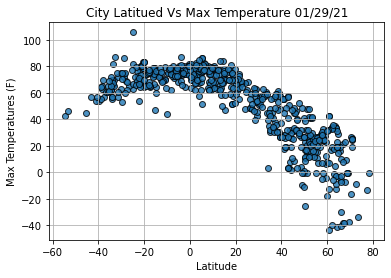

In [15]:
# import time module
import time

# Build a scattered plot
plt.scatter(lats,max_temps,edgecolor = "black",linewidths=1,marker="o",
            alpha=0.8, label="Cities")

# Other graph attribts
plt.title(f"City Latitued Vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperatures (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the fiure
plt.savefig("weather_data/fig1.png")

# show plot
plt.show()

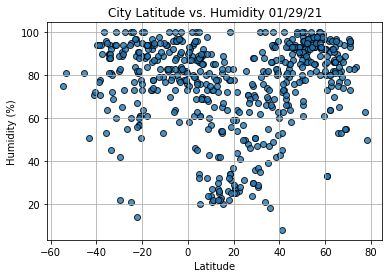

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

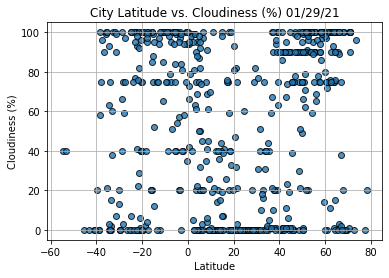

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

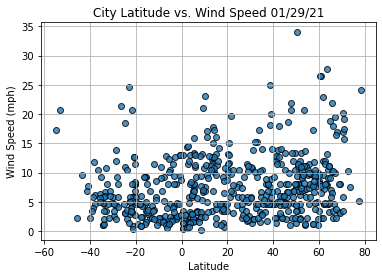

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## 6.4.2 - Correlation

In [19]:
# Import linregress
from scipy.stats import linregress


In [98]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.grid="True"
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"r_value: {r_value}")
    plt.show()


In [99]:
index13 = city_data_df.loc[13]
index13

City             Praia Da Vitoria
Country                        PT
Date          2021-01-30 03:32:59
Lat                       38.7333
Lng                      -27.0667
Max Temp                       59
Humidity                       82
Cloudiness                     20
Wind Speed                  18.12
Name: 13, dtype: object

In [100]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
565    False
566    False
567     True
568    False
569     True
Name: Lat, Length: 570, dtype: bool

In [101]:
# northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0) and (city_data_df["Max Temp"] >= 0)]

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0 ]
northern_hemi_df = northern_hemi_df.loc[ northern_hemi_df["Max Temp"] >= 40]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df = southern_hemi_df.loc[ southern_hemi_df["Max Temp"] >= 40]

r_value: -0.7952275386196581


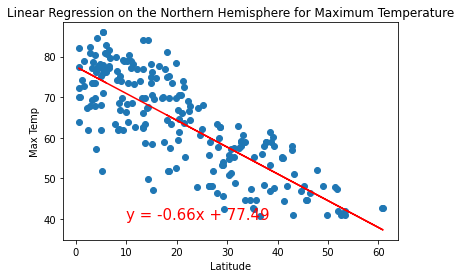

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


r_value: 0.5094823959449201


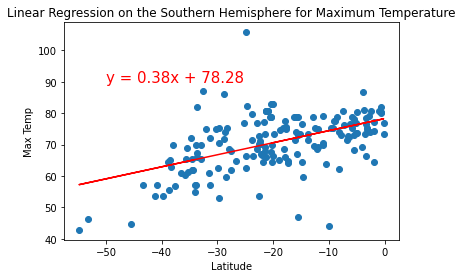

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

## 6.4.3 - Find the correlation between Latitude and percent humidity

r_value: 0.005661527965466022


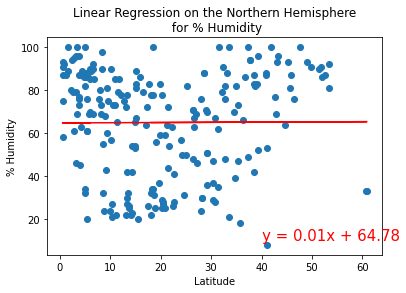

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

r_value: 0.13146065619633562


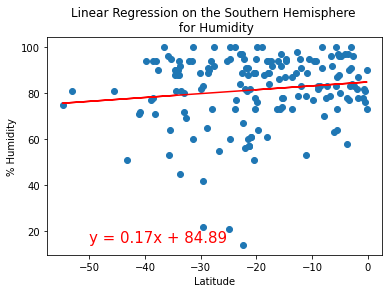

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Humidity', '% Humidity',(-50,15))

# r_value

## 6.4.4 - Latitude Vs Cloudiness

r_value: 0.05424861622526386


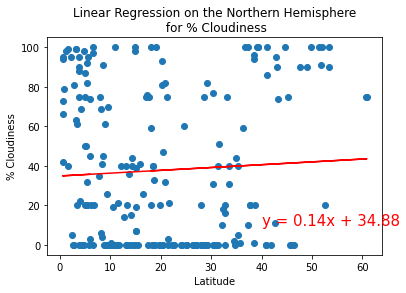

In [106]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness', '% Cloudiness',(40,10))

r_value: 0.34802743708866435


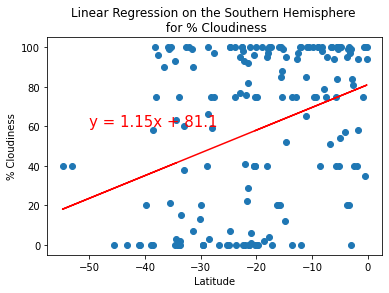

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

## 6.4.5 Lat Vs Wind Speed

r_value: 0.21829925417847823


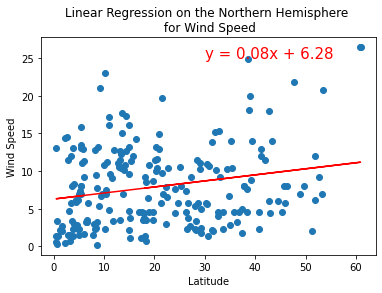

In [112]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(30,25))

r_value: -0.140592654094747


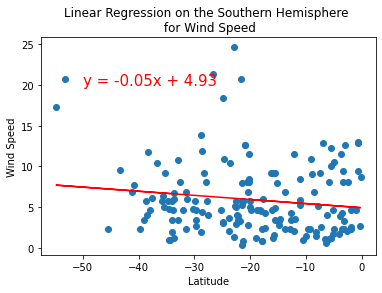

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))
